In [1]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("003. Peso").getOrCreate()

In [2]:
datos=spark.read.csv("peso.csv",header=True,inferSchema=True)

In [3]:
datos.printSchema(),datos.show()

root
 |-- Edad: integer (nullable = true)
 |-- Peso: double (nullable = true)

+----+----+
|Edad|Peso|
+----+----+
|   0| 3.4|
|   3| 5.6|
|   6| 7.3|
|   9| 8.9|
|  12| 9.5|
|  15|11.0|
|  18|11.5|
|  24|12.4|
|  36|14.4|
|  48|15.5|
|  60|17.4|
|  72|19.6|
|  84|21.2|
|  96|23.5|
+----+----+



(None, None)

In [4]:
from pyspark.ml.feature import VectorAssembler

In [5]:
constructor=VectorAssembler(inputCols=["Edad"],outputCol="features")

In [6]:
datosConVector=constructor.transform(datos)

In [7]:
datosConVector.show()

+----+----+--------+
|Edad|Peso|features|
+----+----+--------+
|   0| 3.4|   [0.0]|
|   3| 5.6|   [3.0]|
|   6| 7.3|   [6.0]|
|   9| 8.9|   [9.0]|
|  12| 9.5|  [12.0]|
|  15|11.0|  [15.0]|
|  18|11.5|  [18.0]|
|  24|12.4|  [24.0]|
|  36|14.4|  [36.0]|
|  48|15.5|  [48.0]|
|  60|17.4|  [60.0]|
|  72|19.6|  [72.0]|
|  84|21.2|  [84.0]|
|  96|23.5|  [96.0]|
+----+----+--------+



In [8]:
datosFinales=datosConVector.select("features","Peso")
datosFinales.show()

+--------+----+
|features|Peso|
+--------+----+
|   [0.0]| 3.4|
|   [3.0]| 5.6|
|   [6.0]| 7.3|
|   [9.0]| 8.9|
|  [12.0]| 9.5|
|  [15.0]|11.0|
|  [18.0]|11.5|
|  [24.0]|12.4|
|  [36.0]|14.4|
|  [48.0]|15.5|
|  [60.0]|17.4|
|  [72.0]|19.6|
|  [84.0]|21.2|
|  [96.0]|23.5|
+--------+----+



In [9]:
from pyspark.ml.regression import LinearRegression

In [10]:
lr=LinearRegression(labelCol="Peso")

In [11]:
datosEntrena,datosEvalua=datosFinales.randomSplit([0.8,0.2])

In [12]:
datosEntrena.show(),datosEvalua.show()

+--------+----+
|features|Peso|
+--------+----+
|   [3.0]| 5.6|
|   [6.0]| 7.3|
|  [15.0]|11.0|
|  [18.0]|11.5|
|  [24.0]|12.4|
|  [36.0]|14.4|
|  [48.0]|15.5|
|  [60.0]|17.4|
|  [72.0]|19.6|
|  [84.0]|21.2|
+--------+----+

+--------+----+
|features|Peso|
+--------+----+
|   [0.0]| 3.4|
|   [9.0]| 8.9|
|  [12.0]| 9.5|
|  [96.0]|23.5|
+--------+----+



(None, None)

In [13]:
modelo=lr.fit(datosEntrena)

In [14]:
modelo.coefficients, modelo.intercept

(DenseVector([0.1739]), 7.224875249500983)

In [15]:
modelo.summary.r2 # coeficiente de determinación r2, 1 vamos Bien, 0 Mal

0.953877671042293

In [16]:
modelo.summary.residuals.show()

+--------------------+
|           residuals|
+--------------------+
| -2.1466067864271325|
| -0.9683383233532803|
|  1.1664670658682734|
|  1.1447355289421246|
|  1.0012724550898273|
|  0.9143463073852338|
|-0.07257984031936004|
|-0.25950598802395675|
|-0.14643213572854918|
| -0.6333582834331466|
+--------------------+



In [17]:
evalua=modelo.evaluate(datosEvalua)

In [18]:
evalua.r2

0.9325585397018593

In [19]:
evalua.predictions.show()

+--------+----+------------------+
|features|Peso|        prediction|
+--------+----+------------------+
|   [0.0]| 3.4| 7.224875249500983|
|   [9.0]| 8.9| 8.790069860279429|
|  [12.0]| 9.5| 9.311801397205578|
|  [96.0]|23.5|23.920284431137738|
+--------+----+------------------+



In [20]:
modeloNuevo=lr.fit(datosFinales)

In [21]:
modeloNuevo.summary.r2

0.9491899897888277

In [22]:
modeloNuevo.coefficients,modeloNuevo.intercept

(DenseVector([0.1813]), 6.6876302521008375)

In [23]:
modeloNuevo.summary.residuals.show()

+--------------------+
|           residuals|
+--------------------+
| -3.2876302521008376|
|  -1.631563025210082|
|-0.47549579831932487|
|  0.5805714285714316|
|  0.6366386554621872|
|  1.5927058823529432|
|   1.548773109243701|
|  1.3609075630252132|
|   1.185176470588237|
|  0.1094453781512641|
|-0.16628571428571348|
| -0.1420168067226868|
| -0.7177478991596615|
|  -0.593478991596637|
+--------------------+



In [24]:
modeloNuevo.summary.predictions.show()

+--------+----+------------------+
|features|Peso|        prediction|
+--------+----+------------------+
|   [0.0]| 3.4|6.6876302521008375|
|   [3.0]| 5.6|7.2315630252100815|
|   [6.0]| 7.3| 7.775495798319325|
|   [9.0]| 8.9| 8.319428571428569|
|  [12.0]| 9.5| 8.863361344537813|
|  [15.0]|11.0| 9.407294117647057|
|  [18.0]|11.5| 9.951226890756299|
|  [24.0]|12.4|11.039092436974787|
|  [36.0]|14.4|13.214823529411763|
|  [48.0]|15.5|15.390554621848736|
|  [60.0]|17.4|17.566285714285712|
|  [72.0]|19.6|19.742016806722688|
|  [84.0]|21.2| 21.91774789915966|
|  [96.0]|23.5|24.093478991596637|
+--------+----+------------------+



In [25]:
modeloNuevo.summary.meanAbsoluteError

1.0020312124849942

In [26]:
modeloNuevo.summary.meanSquaredError

1.6827342136854744

In [27]:
modeloNuevo.summary.rootMeanSquaredError

1.2972024567065368

In [28]:
df=spark.createDataFrame([(10.0,),(27.0,)],["Edad"])

In [29]:
df.show(),df.printSchema()

+----+
|Edad|
+----+
|10.0|
|27.0|
+----+

root
 |-- Edad: double (nullable = true)



(None, None)

In [30]:
dfConVector=constructor.transform(df)
dfConVector.show()

+----+--------+
|Edad|features|
+----+--------+
|10.0|  [10.0]|
|27.0|  [27.0]|
+----+--------+



In [31]:
resultado=modeloNuevo.transform(dfConVector)

In [32]:
resultado.show()

+----+--------+------------------+
|Edad|features|        prediction|
+----+--------+------------------+
|10.0|  [10.0]| 8.500739495798317|
|27.0|  [27.0]|11.583025210084031|
+----+--------+------------------+



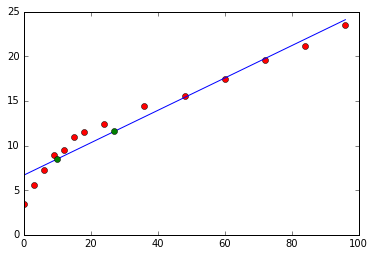

In [34]:
import matplotlib.pyplot as grafica

x=datos.rdd.keys().collect()
y=datos.rdd.values().collect()
y2=modeloNuevo.summary.predictions.select("prediction").collect()
x3=resultado.select("Edad").collect()
y3=resultado.select("prediction").collect()
grafica.plot(x,y,"ro")
grafica.plot(x,y2)
grafica.plot(x3,y3,"go")
grafica.show()